In [1]:
import pandas as pd
import os
data = pd.read_csv("filtered_file.csv")
data['Class'] = data['Class'].str.strip().str.capitalize()
data['Class'] = data['Class'].replace('Abusive', 'Abusive')
print("Class Distribution After Normalization:")
print(data['Class'].value_counts())

downloads_folder = os.path.expanduser('~')
cleaned_file_path = os.path.join(downloads_folder, 'cleaned_AWT_train.csv')
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

Class Distribution After Normalization:
Class
Non-abusive    1366
Abusive        1366
Name: count, dtype: int64
Cleaned dataset saved to: C:\Users\VARUN BALAJI\cleaned_AWT_train.csv


In [3]:
data.head(10)

,Text,Class
0,கார்த்தி நா பாத்த. அவன .முகத்த மட்டும் பாத்துர:,Non-abusive
1,Appo sri vanth உங்களுக்கு ஹெல்ப் பண்ணது எல்லாம...,Non-abusive
2,இது ஒரு லூசு அது ஒரு லூசு இந்த ரெண்டு லூசு உங்...,Abusive
3,என்ன மாறி யாரேல்லாம் இங்க கமெண்ட் படிக்க வந்தவ...,Non-abusive
4,உங்களுக்கு எ‌ல்லா‌ம் சிலை தான் வைக்கணும்.........,Non-abusive
5,ஐயோ கன்னித்தீவு மாதிரி இருக்குடா சாமி.....திண்...,Non-abusive
6,கோத்தவா இது ஒரு பிரச்சனைனு இதை ஒரு நிகழ்ச்சியா...,Non-abusive
7,இந்த எபிசோட். பார்த்தால் பைத்தியம் பிடித்து வி...,Non-abusive
8,உண்மை தெரிச்சு பேயிட இவலவு நாள் வரதவன் இனிய வர...,Abusive
9,தறுதலைக்கு தமிழ்உச்சரிப்பே சரியா வரல இவளையும் ...,Abusive


In [5]:
import pandas as pd
data = pd.read_csv("cleaned_AWT_train.csv")
print("Missing Values Before Handling:")
print(data.isnull().sum())
data.fillna({'Text': ''}, inplace=True)
data['Text'] = data['Text'].str.lower()
print("\nMissing Values After Handling:")
print(data.isnull().sum())

import os
downloads_folder = os.path.expanduser('~')
preprocessed_file_path = os.path.join(downloads_folder, 'preprocessed_AWT_train.csv')
data.to_csv(preprocessed_file_path, index=False)

print(f"\nPreprocessed dataset saved to: {preprocessed_file_path}")


Missing Values Before Handling:
Text     0
Class    0
dtype: int64

Missing Values After Handling:
Text     0
Class    0
dtype: int64

Preprocessed dataset saved to: C:\Users\revan\preprocessed_AWT_train.csv


In [6]:
import pandas as pd
import string
import re
data = pd.read_csv("preprocessed_AWT_train.csv")
def remove_punctuation(text):
    punctuation = r"[!@#$%^&*()≥≤?:\"|}{\[\].,/’;]"
    text = re.sub(punctuation, "", text)
    return text
data['Text'] = data['Text'].apply(remove_punctuation)

print(data.head())

import os
downloads_folder = os.path.expanduser('~')
cleaned_file_path = os.path.join(downloads_folder, 'cleaned_no_punctuation_AWT_train.csv')
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned No Punctuation dataset saved to: {preprocessed_file_path}")


                                                Text        Class
0       கார்த்தி நா பாத்த அவன முகத்த மட்டும் பாத்துர  Non-abusive
1  appo sri vanth உங்களுக்கு ஹெல்ப் பண்ணது எல்லாம...  Non-abusive
2  இது ஒரு லூசு அது ஒரு லூசு இந்த ரெண்டு லூசு உங்...      Abusive
3  என்ன மாறி யாரேல்லாம் இங்க கமெண்ட் படிக்க வந்தவ...  Non-abusive
4  உங்களுக்கு எ‌ல்லா‌ம் சிலை தான் வைக்கணும் நாட்ட...  Non-abusive

Cleaned No Punctuation dataset saved to: C:\Users\revan\preprocessed_AWT_train.csv


In [7]:
print(data['Class'].value_counts())

Class
Non-abusive    1366
Abusive        1366
Name: count, dtype: int64


In [8]:
import pandas as pd
import re
data = pd.read_csv("cleaned_no_punctuation_AWT_train.csv")
def remove_repeating_words(text):
    text = re.sub(r'\b(\w+)\s+\1\b', r'\1', text)
    return text
    data['Text'] = data['Text'].apply(remove_repeating_words)
print(data.head())

import os
downloads_folder = os.path.expanduser('~')
cleaned_file_path = os.path.join(downloads_folder, 'cleaned_no_repeating_words_AWT_train.csv')
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned No Repeating Words dataset saved to: {preprocessed_file_path}")


                                                Text        Class
0       கார்த்தி நா பாத்த அவன முகத்த மட்டும் பாத்துர  Non-abusive
1  appo sri vanth உங்களுக்கு ஹெல்ப் பண்ணது எல்லாம...  Non-abusive
2  இது ஒரு லூசு அது ஒரு லூசு இந்த ரெண்டு லூசு உங்...      Abusive
3  என்ன மாறி யாரேல்லாம் இங்க கமெண்ட் படிக்க வந்தவ...  Non-abusive
4  உங்களுக்கு எ‌ல்லா‌ம் சிலை தான் வைக்கணும் நாட்ட...  Non-abusive

Cleaned No Repeating Words dataset saved to: C:\Users\revan\preprocessed_AWT_train.csv


In [9]:
print(data['Class'].value_counts())

Class
Non-abusive    1366
Abusive        1366
Name: count, dtype: int64


In [10]:
import pandas as pd
from nltk.tokenize import word_tokenize
data = pd.read_csv("cleaned_no_repeating_words_AWT_train.csv")
data['Tokens'] = data['Text'].apply(word_tokenize)
total_tokens = sum(data['Tokens'].apply(len))
print(f"Total tokens generated: {total_tokens}")
data.to_csv('tokens_generated.csv', index=False)


Total tokens generated: 39143


In [19]:
data.head(5)

,Text,Class,Tokens,Processed_Text
0,கார்த்தி நா பாத்த அவன முகத்த மட்டும் பாத்துர,Non-abusive,"['கார்த்தி', 'நா', 'பாத்த', 'அவன', 'முகத்த', '...",கார்த்தி நா பாத்த அவன முகத்த மட்டும் பாத்துர
1,appo sri vanth உங்களுக்கு ஹெல்ப் பண்ணது எல்லாம...,Non-abusive,"['appo', 'sri', 'vanth', 'உங்களுக்கு', 'ஹெல்ப்...",appo sri vanth உங்களுக்கு ஹெல்ப் பண்ணது எல்லாம...
2,இது ஒரு லூசு அது ஒரு லூசு இந்த ரெண்டு லூசு உங்...,Abusive,"['இது', 'ஒரு', 'லூசு', 'அது', 'ஒரு', 'லூசு', '...",லூசு லூசு ரெண்டு லூசு உங்களை வைத்து வீடியோ எடு...
3,என்ன மாறி யாரேல்லாம் இங்க கமெண்ட் படிக்க வந்தவ...,Non-abusive,"['என்ன', 'மாறி', 'யாரேல்லாம்', 'இங்க', 'கமெண்ட...",மாறி யாரேல்லாம் இங்க கமெண்ட் படிக்க வந்தவுங்க
4,உங்களுக்கு எ‌ல்லா‌ம் சிலை தான் வைக்கணும் நாட்ட...,Non-abusive,"['உங்களுக்கு', 'எ\u200cல்லா\u200cம்', 'சிலை', ...",உங்களுக்கு எ‌ல்லா‌ம் சிலை வைக்கணும் நாட்டுக்கு...


In [12]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter

tamil_stopwords = set([
    'ஆனால்', 'மற்றும்', 'இது', 'அந்த', 'இந்த', 'என்று', 'தான்', 'ஒரு', 'என்ன', 'எவர்',
    'எங்கு', 'எப்படி', 'எப்போது', 'என்று', 'அவர்', 'அவர்கள்', 'அவை', 'அதை', 'நான்',
    'நீ', 'அது', 'நாம்', 'நமது', 'உன்', 'என்', 'உங்கள்', 'எங்கள்', 'எந்த', 'அல்லது',
    'இவை', 'இவள்', 'இவர்', 'இவ்வாறு', 'அவ்வாறு', 'ஆக', 'பின்', 'இங்கே', 'அங்கே',
    'இப்போது', 'அப்போது', 'மிகவும்', 'வேறு', 'சிறு', 'பெரிய', 'அவை', 'அதில்', 'அல்ல',
    'அதனால்', 'இதனால்', 'ஆகவே', 'அதற்கு', 'இதற்கு', 'எதற்கு', 'இங்கு', 'அவரது'
])

data = pd.read_csv('tokens_generated.csv')
text_data = data['Text']

stop_words = set(stopwords.words('english')).union(tamil_stopwords)

all_tokens = []

for text in text_data:
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    all_tokens.extend(tokens)

word_counts = Counter(all_tokens)
top_20_words = word_counts.most_common(20)

top_20_df = pd.DataFrame(top_20_words, columns=['Word', 'Frequency'])
print(top_20_df)

def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['Text'].apply(get_sentiment)

sentiment_counts = data['Sentiment'].value_counts()

print("Sentiment Distribution:")
print(sentiment_counts)


         Word  Frequency
0          இவ        169
1           ல         74
2          அவ         74
3          வர         68
4         இவள         54
5          அட         42
6          பல         34
7         mam         31
8       madam         23
9          அத         22
10  interview         21
11         இத         21
12        உலக         19
13    youtube         17
14         என         15
15    channel         15
16         ah         15
17    content         14
18          ஐ         14
19          ஏ         13
Sentiment Distribution:
Sentiment
neutral     2653
positive      55
negative      24
Name: count, dtype: int64


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Define Tamil stop words
tamil_stopwords = set([
    'ஆனால்', 'மற்றும்', 'இது', 'அந்த', 'இந்த', 'என்று', 'தான்', 'ஒரு', 'என்ன', 'எவர்',
    'எங்கு', 'எப்படி', 'எப்போது', 'அவர்', 'அவர்கள்', 'அவை', 'அதை', 'நான்',
    'நீ', 'அது', 'நாம்', 'நமது', 'உன்', 'என்', 'உங்கள்', 'எங்கள்', 'எந்த', 'அல்லது',
    'இவை', 'இவள்', 'இவர்', 'இவ்வாறு', 'அவ்வாறு', 'ஆக', 'பின்', 'இங்கே', 'அங்கே',
    'இப்போது', 'அப்போது', 'மிகவும்', 'வேறு', 'சிறு', 'பெரிய', 'அவை', 'அதில்', 'அல்ல',
    'அதனால்', 'இதனால்', 'ஆகவே', 'அதற்கு', 'இதற்கு', 'எதற்கு', 'இங்கு', 'அவரது'
])

# Load data
data = pd.read_csv('tokens_generated.csv')

# Preprocess the text
def preprocess_text(text, stop_words):
    tokens = text.split()  # Simple whitespace tokenizer
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(tokens)

# Apply preprocessing
data['Processed_Text'] = data['Text'].apply(lambda x: preprocess_text(x, tamil_stopwords))

# Save the updated DataFrame back to the same CSV file
data.to_csv('tokens_generated.csv', index=False)

# Vectorize the preprocessed text
vectorizer = TfidfVectorizer()  # No stop words needed here since preprocessing is done
X_tfidf = vectorizer.fit_transform(data['Processed_Text'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['Class'], test_size=0.25, random_state=42)

print("Updated file saved and training/testing sets prepared.")


Updated file saved and training/testing sets prepared.


In [23]:
print(data.columns)


Index(['Text', 'Class', 'Tokens', 'Processed_Text'], dtype='object')


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define Tamil stop words
tamil_stopwords = set([
    'ஆனால்', 'மற்றும்', 'இது', 'அந்த', 'இந்த', 'என்று', 'தான்', 'ஒரு', 'என்ன', 'எவர்',
    'எங்கு', 'எப்படி', 'எப்போது', 'அவர்', 'அவர்கள்', 'அவை', 'அதை', 'நான்',
    'நீ', 'அது', 'நாம்', 'நமது', 'உன்', 'என்', 'உங்கள்', 'எங்கள்', 'எந்த', 'அல்லது',
    'இவை', 'இவள்', 'இவர்', 'இவ்வாறு', 'அவ்வாறு', 'ஆக', 'பின்', 'இங்கே', 'அங்கே',
    'இப்போது', 'அப்போது', 'மிகவும்', 'வேறு', 'சிறு', 'பெரிய', 'அவை', 'அதில்', 'அல்ல',
    'அதனால்', 'இதனால்', 'ஆகவே', 'அதற்கு', 'இதற்கு', 'எதற்கு', 'இங்கு', 'அவரது'
])

# Normalize stop words for compatibility
normalized_stop_words = {word.lower() for word in tamil_stopwords}

# Load the dataset
data = pd.read_csv('tokens_generated.csv')

# Combine English and Tamil stop words
stop_words = list(ENGLISH_STOP_WORDS.union(normalized_stop_words))

# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words)

# Fit and transform the processed text
X_tfidf = vectorizer.fit_transform(data['Processed_Text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, data['Class'], test_size=0.25, random_state=42
)

# Train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Display results
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

     Abusive       0.66      0.62      0.64       334
 Non-abusive       0.66      0.70      0.68       349

    accuracy                           0.66       683
   macro avg       0.66      0.66      0.66       683
weighted avg       0.66      0.66      0.66       683

Accuracy: 65.89%


C:\Users\revan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['அங', 'அத', 'அதன', 'அதற', 'அந', 'அப', 'அல', 'அவ', 'அவர', 'அவரத', 'ஆகவ', 'ஆன', 'இங', 'இத', 'இதன', 'இதற', 'இந', 'இப', 'இவ', 'இவர', 'இவள', 'உங', 'உன', 'எங', 'எதற', 'எந', 'என', 'எப', 'எவர', 'ஒர', 'கள', 'கவ', 'நமத', 'பட', 'மற', 'லத'] not in stop_words.
  warnings.warn(


C:\Users\revan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['அதன', 'அதற', 'அந', 'அவர', 'இத', 'இதற', 'உங', 'உத', 'எத', 'எனக', 'எனவ', 'ஒர', 'கள', 'சர', 'தல', 'ரணம', 'வந'] not in stop_words.
  warnings.warn(


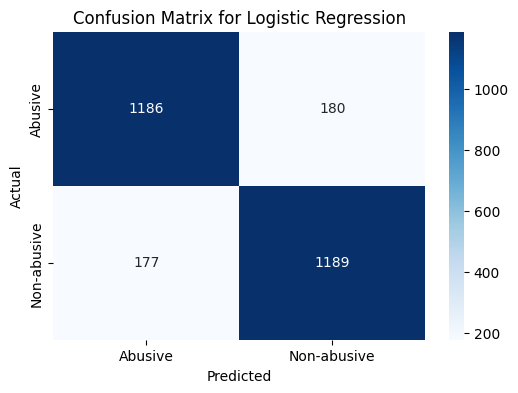

Logistic Regression - Accuracy: 0.869
Logistic Regression - Precision: 0.870
Logistic Regression - Recall: 0.868
Logistic Regression - F1 Score: 0.869
Model and vectorizer saved.


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import joblib

tamil_stopwords = [
    'அத', 'அவ', 'ஆ', 'இ', 'உ', 'எ', 'ஒ', 'ஓ', 'ஏ', 'ஐ', 'ஃ', 'ஏன', 'ஆன', 'என', 'இதை', 'அந்த', 
    'அவர்கள்', 'உங்களின்', 'நாம்', 'நிறைய', 'எனவே', 'ஒரு', 'காரணம்', 'வந்து', 'தலைபார்க்க', 'குறைந்த', 
    'சரி', 'மேலும்', 'இதற்கு', 'அதற்கு', 'உதாரணமாக', 'அதன்', 'பிற', 'எனக்கு', 'செய்ய', 'எதுவும்', 'போது'
]

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
combined_stopwords = list(set(ENGLISH_STOP_WORDS).union(tamil_stopwords))

train_data = pd.read_csv('tokens_generated.csv')
test_data = pd.read_csv('tokens_generated.csv')

vectorizer = TfidfVectorizer(max_features=5000, stop_words=combined_stopwords, ngram_range=(1, 2))

X_train = vectorizer.fit_transform(train_data['Text'])
y_train = train_data['Class']
X_test = vectorizer.transform(test_data['Text'])
y_test = test_data['Class']

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

acc_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, pos_label="Abusive", average="binary")
recall_logreg = recall_score(y_test, y_pred_logreg, pos_label="Abusive", average="binary")
f1_logreg = f1_score(y_test, y_pred_logreg, pos_label="Abusive", average="binary")

cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels=["Abusive", "Non-abusive"])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=["Abusive", "Non-abusive"], yticklabels=["Abusive", "Non-abusive"])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Logistic Regression - Accuracy: {acc_logreg:.3f}")
print(f"Logistic Regression - Precision: {precision_logreg:.3f}")
print(f"Logistic Regression - Recall: {recall_logreg:.3f}")
print(f"Logistic Regression - F1 Score: {f1_logreg:.3f}")

joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Model and vectorizer saved.")


In [28]:
rf = joblib.load('logistic_regression_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')
tamil_sentence = ["இவ ஒரு மானெங்கெட்ட பொறுக்கி. ஒரே ஒரு routine ஒர்க் அவளுக்கு இருக்குறது தண்ணிய போட்டுட்டு அசிங்கமா பேசுறது."]
features = vectorizer.transform(tamil_sentence)
prediction = rf.predict(features)
print(f"Prediction: {'Abusive' if prediction[0] == 'Abusive' else 'Non-abusive'}")

Prediction: Abusive


C:\Users\revan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['அதன', 'அதற', 'அந', 'அவர', 'இத', 'இதற', 'உங', 'உத', 'எத', 'எனக', 'எனவ', 'ஒர', 'கள', 'சர', 'தல', 'ரணம', 'வந'] not in stop_words.
  warnings.warn(


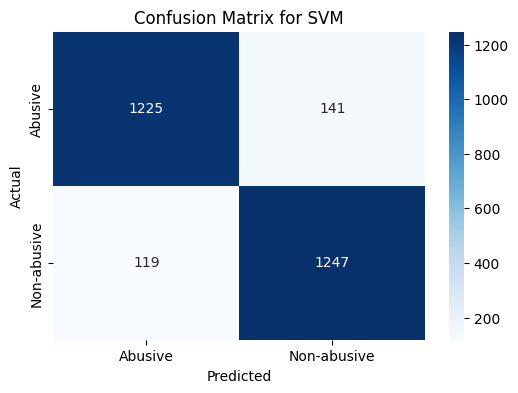

SVM - Accuracy: 0.905
SVM - Precision: 0.911
SVM - Recall: 0.897
SVM - F1 Score: 0.904
Model and vectorizer saved.


In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

svm = SVC(kernel='linear', probability=True, random_state=30)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label="Abusive", average="binary")
recall_svm = recall_score(y_test, y_pred_svm, pos_label="Abusive", average="binary")
f1_svm = f1_score(y_test, y_pred_svm, pos_label="Abusive", average="binary")

cm_svm = confusion_matrix(y_test, y_pred_svm, labels=["Abusive", "Non-abusive"])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=["Abusive", "Non-abusive"], yticklabels=["Abusive", "Non-abusive"])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"SVM - Accuracy: {acc_svm:.3f}")
print(f"SVM - Precision: {precision_svm:.3f}")
print(f"SVM - Recall: {recall_svm:.3f}")
print(f"SVM - F1 Score: {f1_svm:.3f}")

joblib.dump(svm, 'svm_model1.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Model and vectorizer saved.")


In [30]:
rf = joblib.load('svm_model1.pkl')
vectorizer = joblib.load('vectorizer.pkl')
tamil_sentence = ["இவ ஒரு மானெங்கெட்ட பொறுக்கி. ஒரே ஒரு routine ஒர்க் அவளுக்கு இருக்குறது தண்ணிய போட்டுட்டு அசிங்கமா பேசுறது."]
features = vectorizer.transform(tamil_sentence)
prediction = rf.predict(features)
print(f"Prediction: {'Abusive' if prediction[0] == 'Abusive' else 'Non-abusive'}")

Prediction: Abusive


C:\Users\revan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['அதன', 'அதற', 'அந', 'அவர', 'இத', 'இதற', 'உங', 'உத', 'எத', 'எனக', 'எனவ', 'ஒர', 'கள', 'சர', 'தல', 'ரணம', 'வந'] not in stop_words.
  warnings.warn(


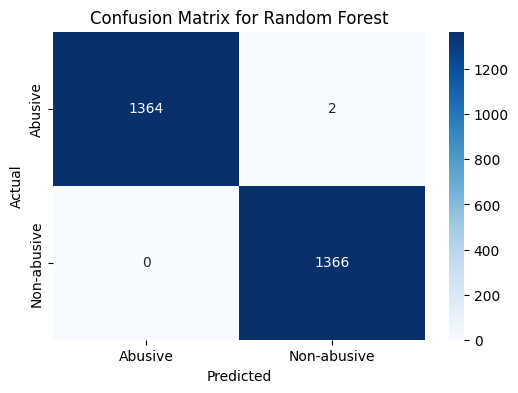

Random Forest - Accuracy: 0.999
Random Forest - Precision: 1.000
Random Forest - Recall: 0.999
Random Forest - F1 Score: 0.999
Model and vectorizer saved.


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label="Abusive", average="binary")
recall_rf = recall_score(y_test, y_pred_rf, pos_label="Abusive", average="binary")
f1_rf = f1_score(y_test, y_pred_rf, pos_label="Abusive", average="binary")

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=["Abusive", "Non-abusive"])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Abusive", "Non-abusive"], yticklabels=["Abusive", "Non-abusive"])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Random Forest - Accuracy: {acc_rf:.3f}")
print(f"Random Forest - Precision: {precision_rf:.3f}")
print(f"Random Forest - Recall: {recall_rf:.3f}")
print(f"Random Forest - F1 Score: {f1_rf:.3f}")

joblib.dump(rf, 'random_forest_model1.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Model and vectorizer saved.")


In [ ]:
# Run

In [34]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# Load data
data = pd.read_csv('tokens_generated.csv')

# Prepare features and labels
X = data['Processed_Text'].values
y = data['Class'].values

# Remove NaN values
X = X[~pd.isnull(X)]
y = y[~pd.isnull(y)]

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer for text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size:", vocab_size)

# Padding sequences to fixed length
max_len = 500
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_sequences, padding='post', maxlen=max_len)
X_test_pad = pad_sequences(X_test_sequences, padding='post', maxlen=max_len)

# Adjusted class weights to be more balanced
class_weight = {0: 1, 1: 1}

# Define the GRU model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=vocab_size, output_dim=128))
gru_model.add(GRU(256, return_sequences=False))
gru_model.add(Dense(128, activation='relu'))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
gru_model.fit(X_train_pad, np.array(y_train), epochs=10, batch_size=64, validation_data=(X_test_pad, np.array(y_test)), class_weight=class_weight)

# Predictions with threshold of 0.5
y_pred_gru = gru_model.predict(X_test_pad)
y_pred_gru = (y_pred_gru > 0.5).astype(int)  # Adjusted threshold to 0.5

# Model Evaluation
print("GRU Model Evaluation:")
print(classification_report(y_test, y_pred_gru))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gru))

# Save the model and tokenizer
gru_model.save('gru_model.keras')
joblib.dump(tokenizer, 'tokenizer_AWT.pkl')

print("Model and tokenizer saved.")


Vocabulary Size: 11711
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.4839 - loss: 0.6956 - val_accuracy: 0.4771 - val_loss: 0.6938
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.4825 - loss: 0.6945 - val_accuracy: 0.4771 - val_loss: 0.6960
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.4772 - loss: 0.6960 - val_accuracy: 0.4771 - val_loss: 0.6975
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.4972 - loss: 0.6942 - val_accuracy: 0.4771 - val_loss: 0.6938
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.4876 - loss: 0.6947 - val_accuracy: 0.4771 - val_loss: 0.6933
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.5034 - loss: 0.6937 - val_accuracy: 0.4771 - val_loss: 0.6937
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.4971 - loss: 0.6932 - val_accuracy: 0.4771 - val_loss: 0.6943
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.4854 - loss: 0.6941 - v

C:\Users\revan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\revan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model and tokenizer saved.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib
import pandas as pd

data = pd.read_csv('tokens_generated.csv')

X = data['Text'].values 
y = data['Class'].values

X = X[~pd.isnull(X)]
y = y[~pd.isnull(y)]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1  
print("Vocabulary Size:", vocab_size)

max_len = 500 
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_sequences, padding='post', maxlen=max_len)
X_test_pad = pad_sequences(X_test_sequences, padding='post', maxlen=max_len)

bidirectional_gru_model = Sequential()
bidirectional_gru_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
bidirectional_gru_model.add(Bidirectional(GRU(256, return_sequences=False))) 
bidirectional_gru_model.add(Dense(128, activation='relu'))  
bidirectional_gru_model.add(Dropout(0.5)) 
bidirectional_gru_model.add(Dense(1, activation='sigmoid')) 

bidirectional_gru_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

bidirectional_gru_model.fit(X_train_pad, np.array(y_train), epochs=50, batch_size=64, validation_data=(X_test_pad, np.array(y_test)))

y_pred_bidirectional_gru = bidirectional_gru_model.predict(X_test_pad)
y_pred_bidirectional_gru = np.round(y_pred_bidirectional_gru).astype(int)

print("Bidirectional GRU Model Evaluation:")
print(classification_report(y_test, y_pred_bidirectional_gru)) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bidirectional_gru))

bidirectional_gru_model.save('bidirectional_gru_model.keras')

joblib.dump(tokenizer, 'tokenizer_AWT_bidirectional_gru.pkl')

print("Model and tokenizer saved.")


Vocabulary Size: 11756
Epoch 1/50


C:\Users\VARUN BALAJI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.5412 - loss: 0.6895 - val_accuracy: 0.4973 - val_loss: 0.9081
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 172s 5s/step - accuracy: 0.8095 - loss: 0.4558 - val_accuracy: 0.6965 - val_loss: 0.7421
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 184s 5s/step - accuracy: 0.9674 - loss: 0.1151 - val_accuracy: 0.6819 - val_loss: 1.0838
Epoch 4/50


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib
import pandas as pd

data = pd.read_csv('tokens_generated.csv')

X = data['Text'].values 
y = data['Class'].values  

X = X[~pd.isnull(X)]
y = y[~pd.isnull(y)]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1  
print("Vocabulary Size:", vocab_size)

max_len = 500  
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_sequences, padding='post', maxlen=max_len)
X_test_pad = pad_sequences(X_test_sequences, padding='post', maxlen=max_len)

multi_dense_gru_model = Sequential()
multi_dense_gru_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
multi_dense_gru_model.add(GRU(256, return_sequences=True)) 
multi_dense_gru_model.add(Dense(128, activation='relu'))  
multi_dense_gru_model.add(GRU(128))  
multi_dense_gru_model.add(Dense(64, activation='relu'))  
multi_dense_gru_model.add(Dropout(0.5)) 
multi_dense_gru_model.add(Dense(1, activation='sigmoid'))  

multi_dense_gru_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

multi_dense_gru_model.fit(X_train_pad, np.array(y_train), epochs=10, batch_size=64, validation_data=(X_test_pad, np.array(y_test)))

y_pred_multi_dense_gru = multi_dense_gru_model.predict(X_test_pad)
y_pred_multi_dense_gru = np.round(y_pred_multi_dense_gru).astype(int)

print("Multi-Dense GRU Model Evaluation:")
print(classification_report(y_test, y_pred_multi_dense_gru))  
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_multi_dense_gru))

multi_dense_gru_model.save('multi_dense_gru_model.keras')

joblib.dump(tokenizer, 'tokenizer_AWT_multi_dense_gru.pkl')

print("Model and tokenizer saved.")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib
import pandas as pd

data = pd.read_csv('tokens_generated.csv')

X = data['Text'].values 
y = data['Class'].values  

X = X[~pd.isnull(X)]
y = y[~pd.isnull(y)]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1 
print("Vocabulary Size:", vocab_size)

max_len = 500  
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_sequences, padding='post', maxlen=max_len)
X_test_pad = pad_sequences(X_test_sequences, padding='post', maxlen=max_len)

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(256, return_sequences=False))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))  

lstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_pad, np.array(y_train), epochs=10, batch_size=64, validation_data=(X_test_pad, np.array(y_test)))

# Evaluate the model
y_pred_lstm = lstm_model.predict(X_test_pad)
y_pred_lstm = np.round(y_pred_lstm).astype(int)  

print("LSTM Model Evaluation:")
print(classification_report(y_test, y_pred_lstm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lstm))

lstm_model.save('lstm_model.keras')

joblib.dump(tokenizer, 'tokenizer_AWT_lstm.pkl')

print("Model and tokenizer saved.")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib
import pandas as pd

data = pd.read_csv('tokens_generated.csv')

X = data['Text'].values  
y = data['Class'].values  

X = X[~pd.isnull(X)]
y = y[~pd.isnull(y)]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1  
print("Vocabulary Size:", vocab_size)

max_len = 500  
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_sequences, padding='post', maxlen=max_len)
X_test_pad = pad_sequences(X_test_sequences, padding='post', maxlen=max_len)

bidirectional_lstm_model = Sequential()
bidirectional_lstm_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
bidirectional_lstm_model.add(Bidirectional(LSTM(256, return_sequences=False))) 
bidirectional_lstm_model.add(Dense(128, activation='relu'))
bidirectional_lstm_model.add(Dropout(0.5))
bidirectional_lstm_model.add(Dense(1, activation='sigmoid'))  

bidirectional_lstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

bidirectional_lstm_model.fit(X_train_pad, np.array(y_train), epochs=10, batch_size=32, validation_data=(X_test_pad, np.array(y_test)))

y_pred_bidirectional_lstm = bidirectional_lstm_model.predict(X_test_pad)
y_pred_bidirectional_lstm = np.round(y_pred_bidirectional_lstm).astype(int)  

print("Bidirectional LSTM Model Evaluation:")
print(classification_report(y_test, y_pred_bidirectional_lstm))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bidirectional_lstm))

bidirectional_lstm_model.save('bidirectional_lstm_model.keras')

joblib.dump(tokenizer, 'tokenizer_AWT_bidirectional_lstm.pkl')

print("Model and tokenizer saved.")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib
import pandas as pd

data = pd.read_csv('tokens_generated.csv')

X = data['Text'].values  
y = data['Class'].values  

X = X[~pd.isnull(X)]
y = y[~pd.isnull(y)]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer and Vocabulary Size
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
print("Vocabulary Size:", vocab_size)

# Convert text to sequences and pad them
max_len = 500  # Adjust based on the data length
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_sequences, padding='post', maxlen=max_len)
X_test_pad = pad_sequences(X_test_sequences, padding='post', maxlen=max_len)

# Model Architecture (Multi-Dense LSTM Model)
multi_dense_lstm_model = Sequential()
multi_dense_lstm_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
multi_dense_lstm_model.add(LSTM(256, return_sequences=True))  # LSTM layer with sequences returned
multi_dense_lstm_model.add(Dense(128, activation='relu'))  # Dense layer
multi_dense_lstm_model.add(LSTM(128))  # Another LSTM layer
multi_dense_lstm_model.add(Dense(64, activation='relu'))  # Dense layer
multi_dense_lstm_model.add(Dropout(0.5))  # Dropout for regularization
multi_dense_lstm_model.add(Dense(1, activation='sigmoid'))  # For binary classification

multi_dense_lstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
multi_dense_lstm_model.fit(X_train_pad, np.array(y_train), epochs=10, batch_size=64, validation_data=(X_test_pad, np.array(y_test)))

# Evaluate the model
y_pred_multi_dense_lstm = multi_dense_lstm_model.predict(X_test_pad)
y_pred_multi_dense_lstm = np.round(y_pred_multi_dense_lstm).astype(int)  # Convert predictions to 0 or 1

print("Multi-Dense LSTM Model Evaluation:")
print(classification_report(y_test, y_pred_multi_dense_lstm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_multi_dense_lstm))

# Save the model
multi_dense_lstm_model.save('multi_dense_lstm_model.keras')

# Optionally, save the tokenizer (if needed later for inference or prediction)
joblib.dump(tokenizer, 'tokenizer_AWT_multi_dense_lstm.pkl')

print("Model and tokenizer saved.")


In [1]:
pip install transformers datasets torch scikit-learn pandas matplotlib



  Using cached tokenizers-0.21.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached aiohappyeyeballs-2.4.4-py3-none-any.whl.metadata (6.1 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.7 MB 11.2 MB/s eta 0:00:01
   -------------- ------------------------- 3.4/9.7 MB 11.8 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.7 MB 16.2 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 16.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   - -------------------------------------- 5.2/203.1 MB 24.5 MB/s eta 0:00:09
   - -------------------------------------- 8.1/203.1 MB 24.0 MB/s eta 0:00:09
   - -------------------------------------- 8.1/203.1 MB 24.0 MB/s eta 0:00:09
   - -------------------------------------- 8.1/203.1 MB 24.0 MB/s eta 0:00:09
   - ------------

In [ ]:
##Multilingual BERT (mBERT) using Hugging Face Transformers 

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\VARUN BALAJI\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\897647993.py:96: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\897647993.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().d

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.648387,0.634369,0.579877,0.731057,0.622611
2,No log,0.554655,0.742230,0.738422,0.749281,0.738931
3,No log,0.580413,0.734918,0.726127,0.756115,0.729575
4,0.528700,0.520087,0.740402,0.739670,0.747756,0.743140
5,0.528700,0.588435,0.753199,0.752352,0.761864,0.756144
6,0.528700,0.829651,0.753199,0.752932,0.752904,0.752965
7,0.528700,1.121187,0.755027,0.754791,0.754743,0.754859
8,0.232000,1.378519,0.742230,0.740980,0.743060,0.740711
9,0.232000,1.532241,0.756856,0.756774,0.756825,0.757134
10,0.232000,1.593653,0.747715,0.746678,0.748254,0.746393


C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\897647993.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\897647993.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\897647993.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[id

Metrics: {'test_loss': 1.593652606010437, 'test_accuracy': 0.7477148080438757, 'test_f1': 0.7466776739690721, 'test_precision': 0.7482535872262379, 'test_recall': 0.7463928150765606, 'test_runtime': 4.8969, 'test_samples_per_second': 111.703, 'test_steps_per_second': 1.838}
Confusion Matrix:
 [[187  77]
 [ 61 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       264
           1       0.74      0.78      0.76       283

    accuracy                           0.75       547
   macro avg       0.75      0.75      0.75       547
weighted avg       0.75      0.75      0.75       547



C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\897647993.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


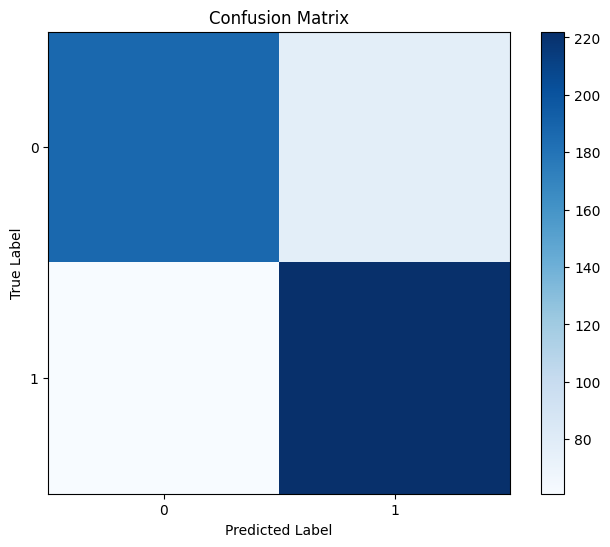

In [2]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 1. Load CSV Dataset with Custom Columns
def load_data(csv_path):
    data = pd.read_csv(csv_path)
    X = data['Processed_Text'].values  # Feature column
    y = data['Class'].values           # Label column
    return X, y

# 2. Tokenizer Setup
def tokenize_data(texts, tokenizer, max_len=128):
    return tokenizer(list(texts), padding=True, truncation=True, max_length=max_len, return_tensors="pt")

# 3. Dataset Class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# 4. Metrics Calculation
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    acc = accuracy_score(labels, preds)
    report = classification_report(labels, preds, output_dict=True)
    return {
        'accuracy': acc,
        'f1': report['macro avg']['f1-score'],
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
    }

# 5. Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(set(y_true)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# 6. Train and Evaluate Model
def train_and_evaluate(csv_path, save_path):
    # Load and preprocess data
    texts, labels = load_data(csv_path)

    # Encode labels to numeric values
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
    encodings = tokenize_data(texts, tokenizer)
    dataset = CustomDataset(encodings, labels)

    # Split dataset into train/test
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

    # Load pre-trained model
    model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(set(labels)))

    # Training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=10,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=64,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        evaluation_strategy="epoch",
        save_strategy="epoch",
    )

    # Trainer setup
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )

    # Train the model
    trainer.train()

    # Save the model
    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)

    # Evaluate the model
    preds = trainer.predict(test_dataset)
    print("Metrics:", preds.metrics)

    # Confusion Matrix and Classification Report
    labels_test = [item['labels'].item() for item in test_dataset]
    preds_labels = np.argmax(preds.predictions, axis=1)
    print("Confusion Matrix:\n", confusion_matrix(labels_test, preds_labels))
    print("Classification Report:\n", classification_report(labels_test, preds_labels))

    # Plot Confusion Matrix
    plot_confusion_matrix(labels_test, preds_labels)

# 7. Main Execution
csv_path = "tokens_generated.csv"  # Replace with your CSV file path
save_path = "./saved_model_tenEpochs"        # Path to save the trained model
train_and_evaluate(csv_path, save_path)

In [2]:
!pip install ipywidgets

   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ----------------------------------- ---- 2.1/2.3 MB 13.0 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 10.2 MB/s eta 0:00:00


In [3]:
!pip install transformers[torch]
!pip install torch

In [2]:
!pip install sentencepiece

   ---------------------------------------- 0.0/991.5 kB ? eta -:--:--
   ------------------------------- -------- 786.4/991.5 kB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 991.5/991.5 kB 7.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 1. Load Dataset
def load_data(csv_path):
    data = pd.read_csv(csv_path)
    X = data['Processed_Text'].values  # Feature column
    y = data['Class'].values           # Label column
    
    # Encode labels if they are strings
    le = LabelEncoder()
    y = le.fit_transform(y)  # Convert string labels to integers
    return X, y


# 2. Tokenizer Setup
def tokenize_data(texts, tokenizer, max_len=128):
    return tokenizer(list(texts), padding=True, truncation=True, max_length=max_len, return_tensors="pt")

# 3. Dataset Class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Ensure labels are integers
        return item


# 4. Metrics Calculation
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    report = classification_report(labels, preds, output_dict=True)
    return {
        'accuracy': report['accuracy'],
        'f1': report['macro avg']['f1-score'],
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
    }

# 5. Train and Evaluate Model
def train_and_evaluate(csv_path, save_path):
    texts, labels = load_data(csv_path)
    tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")
    encodings = tokenize_data(texts, tokenizer)
    dataset = CustomDataset(encodings, labels)

    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

    model = XLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=len(set(labels)))

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=10,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=64,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        evaluation_strategy="epoch",
        save_strategy="epoch",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )

    trainer.train()
    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)
    preds = trainer.predict(test_dataset)
    print("Classification Report:\n", classification_report([item['labels'].item() for item in test_dataset], np.argmax(preds.predictions, axis=1)))

csv_path = "tokens_generated.csv"  # Replace with your CSV file path
save_path = "./xlm-r-saved-model_tenepochs"
train_and_evaluate(csv_path, save_path)


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\VARUN BALAJI\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\2794703859.py:77: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\2794703859.py:35: UserWarning: To copy construct from a tensor, it is recommen

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.605356,0.725777,0.725107,0.732231,0.728370
2,No log,0.566617,0.714808,0.712687,0.728132,0.718660
3,No log,0.609758,0.691042,0.677523,0.747627,0.698997
4,0.610600,0.607262,0.702011,0.694458,0.713887,0.697391
5,0.610600,0.525154,0.749543,0.748976,0.749403,0.748795
6,0.610600,0.669136,0.731261,0.727043,0.756803,0.736468
7,0.610600,0.734300,0.736746,0.736004,0.736711,0.735792
8,0.388300,0.753715,0.720293,0.719558,0.726940,0.722943
9,0.388300,1.040629,0.738574,0.738150,0.738278,0.738068
10,0.388300,1.159184,0.733090,0.733067,0.733439,0.733657


C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\2794703859.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\2794703859.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\2794703859.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       264
           1       0.75      0.72      0.74       283

    accuracy                           0.73       547
   macro avg       0.73      0.73      0.73       547
weighted avg       0.73      0.73      0.73       547



C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\2794703859.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, XLMRobertaTokenizer, XLMRobertaForSequenceClassification, Trainer, TrainingArguments
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder  # This was missing
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# 1. IndicBERT Tokenizer and Model Setup
tokenizer = AutoTokenizer.from_pretrained("ai4bharat/indic-bert")
model = AutoModelForSequenceClassification.from_pretrained("ai4bharat/indic-bert", num_labels=2)

# 1. Load Dataset
def load_data(csv_path):
    data = pd.read_csv(csv_path)
    X = data['Processed_Text'].values  # Feature column
    y = data['Class'].values           # Label column
    
    # Encode labels if they are strings
    le = LabelEncoder()
    y = le.fit_transform(y)  # Convert string labels to integers
    return X, y


# 2. Tokenizer Setup
def tokenize_data(texts, tokenizer, max_len=128):
    return tokenizer(list(texts), padding=True, truncation=True, max_length=max_len, return_tensors="pt")

# 3. Dataset Class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Ensure labels are integers
        return item


# 4. Metrics Calculation
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    report = classification_report(labels, preds, output_dict=True)
    return {
        'accuracy': report['accuracy'],
        'f1': report['macro avg']['f1-score'],
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
    }

# 5. Train and Evaluate Model
def train_and_evaluate(csv_path, save_path):
    texts, labels = load_data(csv_path)
    tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")
    encodings = tokenize_data(texts, tokenizer)
    dataset = CustomDataset(encodings, labels)

    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

    model = XLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=len(set(labels)))

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=10,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=64,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        evaluation_strategy="epoch",
        save_strategy="epoch",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )

    trainer.train()
    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)
    preds = trainer.predict(test_dataset)
    print("Classification Report:\n", classification_report([item['labels'].item() for item in test_dataset], np.argmax(preds.predictions, axis=1)))

csv_path = "tokens_generated.csv"  # Replace with your CSV file path
save_path = "./IndicBERTs_model"
train_and_evaluate(csv_path, save_path)




C:\Users\VARUN BALAJI\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
C:\Users\VARUN BALAJI\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according 

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.690495,0.542962,0.463069,0.649039,0.553956
2,No log,0.584620,0.703839,0.700110,0.709160,0.701308
3,No log,0.615093,0.672761,0.641298,0.742353,0.665139
4,0.621600,0.552497,0.716636,0.714791,0.727277,0.719383
5,0.621600,0.559052,0.740402,0.733013,0.760497,0.736394
6,0.621600,0.745759,0.758684,0.755843,0.765516,0.756295
7,0.621600,0.885713,0.755027,0.754133,0.762821,0.757251
8,0.352300,0.805122,0.753199,0.753037,0.753016,0.753064
9,0.352300,1.211972,0.762340,0.762110,0.765700,0.763767
10,0.352300,1.247332,0.751371,0.751071,0.751239,0.750983


C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\3843466934.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\3843466934.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\3843466934.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       281
           1       0.75      0.74      0.74       266

    accuracy                           0.75       547
   macro avg       0.75      0.75      0.75       547
weighted avg       0.75      0.75      0.75       547



C:\Users\VARUN BALAJI\AppData\Local\Temp\ipykernel_12592\3843466934.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [4]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


CUDA Available: False
Device Name: No GPU detected


In [ ]:
from transformers import XLMRobertaForSequenceClassification, XLMRobertaTokenizer
import torch
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load saved XLM-R model and tokenizer
model_path = "./xlm-r-saved-model"  # Replace with your saved model path
model = XLMRobertaForSequenceClassification.from_pretrained(model_path)
tokenizer = XLMRobertaTokenizer.from_pretrained(model_path)
model.eval()

# Load test data
test_data_path = "filtered_file.csv"  # Replace with your test data path
test_data = pd.read_csv(test_data_path)
texts = test_data['Text'].values  # Replace with your text column name
true_labels = test_data['Class'].values     # Replace with your label column name

# Tokenize the test data
encodings = tokenizer(list(texts), padding=True, truncation=True, max_length=128, return_tensors="pt")

# Perform prediction
with torch.no_grad():
    outputs = model(**encodings)
predictions = torch.argmax(outputs.logits, axis=1).numpy()

# Display classification report
print("Classification Report:\n", classification_report(true_labels, predictions))

# Compute and display confusion matrix
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.config.id2label.values())
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()